In [4]:
import seaborn as sns

In [1]:
import algo_func
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg
import matplotlib
import scipy as sp
import importlib
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('elec_data.csv',index_col = 0)
scaler = StandardScaler()
ot = np.expand_dims(data['OT'].array,axis =1)
ot_ = scaler.fit_transform(ot)

train,valid,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

fil_order = 7
train,val,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

ip_train = train
op_train = train[fil_order+1:]

ip_val = val
op_val = val[fil_order+1:]

ip_test = test
op_test = test[fil_order+1:]

In [3]:
rk_size_arr = np.concatenate((np.linspace(10,1,10),np.linspace(0.9,0.1,9),np.linspace(0.09,0.01,9)))
step_size_arr = np.concatenate((np.linspace(1,0.1,10),np.linspace(0.09,0.01,9),np.linspace(0.009,0.001,9)))
threshold = 0.2
k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

#klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
#klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,threshold)
        #klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)
        #klms_mse_test[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)

28 28


100%|█████████████████████████████████████████| 28/28 [22:53<00:00, 49.04s/it]


<Axes: >

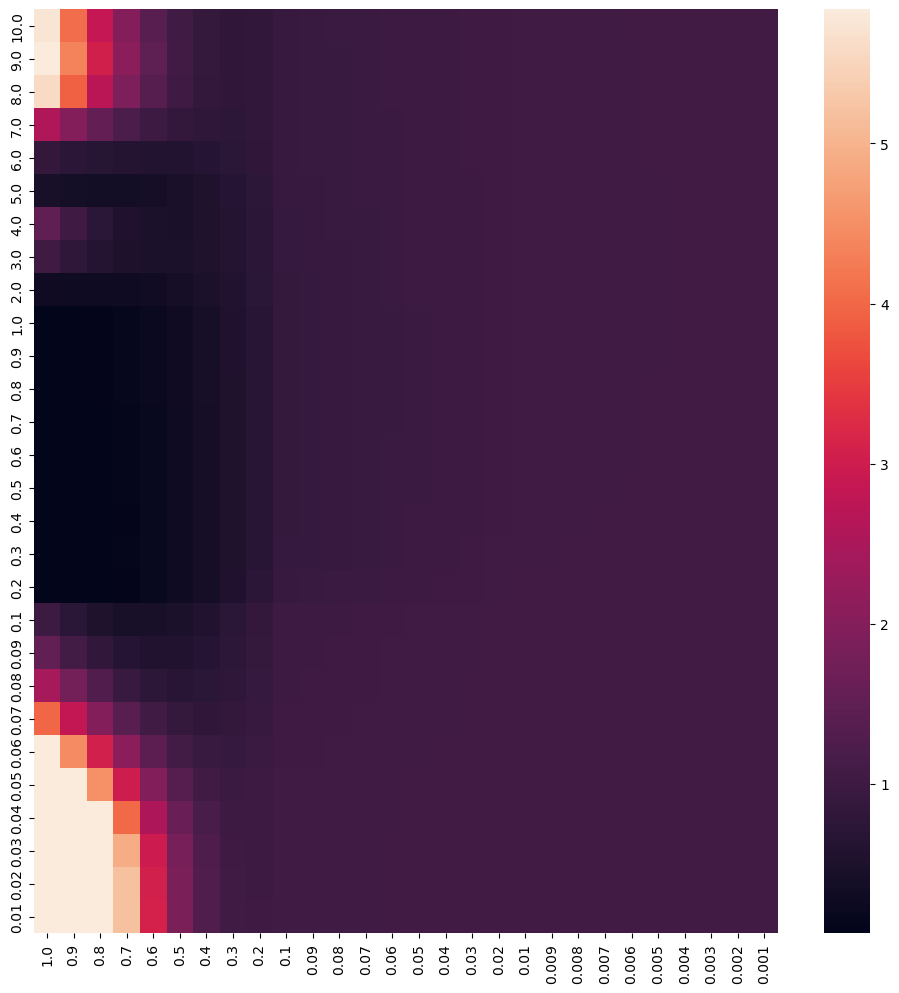

In [11]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = False)

In [13]:
rk_size_arr = np.concatenate((np.linspace(2,1,10),np.linspace(0.9,0.1,9)))
step_size_arr = np.concatenate((np.linspace(2,1,10),np.linspace(1,0.1,10)))
threshold = 0.2
k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

#klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
#klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,threshold)
        #klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)
        #klms_mse_test[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)

19 20


100%|█████████████████████████████████████████| 19/19 [11:07<00:00, 35.13s/it]


<Axes: >

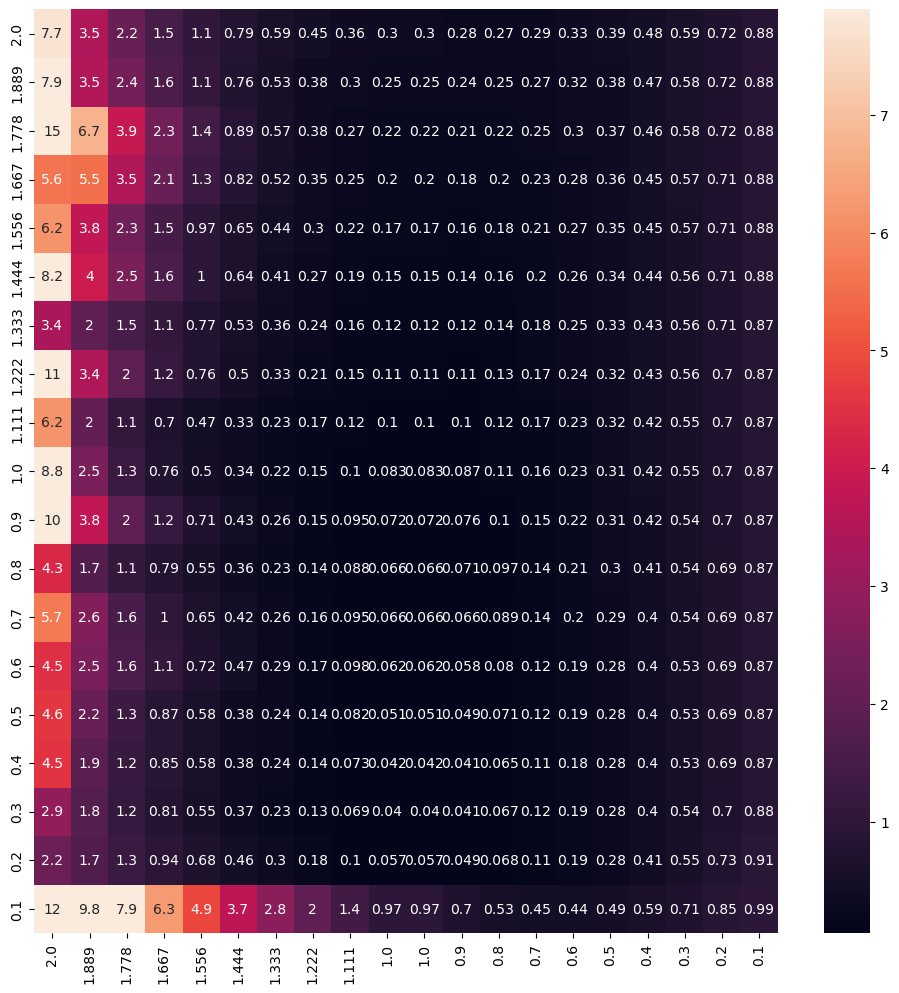

In [15]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

In [18]:
gg = np.argmin(klms_mse_val)
kern_id,step_id = np.unravel_index(gg,klms_mse_val.shape)
print(rk_size_arr[kern_id])
print(step_size_arr[step_id])
print(klms_mse_val[kern_id][step_id])

0.29999999999999993
1.0
0.040399046391760576


In [25]:
rk_size_arr = [0.39]
step_size_arr = [0.9]
threshold = 0.2
k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,alpha,cnt = algo_func.QKLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size,threshold)
        klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)
        klms_mse_test[i][j] = algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size)

1 1


100%|███████████████████████████████████████████| 1/1 [00:02<00:00,  2.24s/it]


In [26]:
klms_mse_train

array([[0.04048675]])

In [27]:
klms_mse_val

array([[0.02442292]])

In [28]:
klms_mse_test

array([[0.12441412]])

In [29]:
y_qklms_mse = algo_func.klms_pred(ip_val,op_val,fil_order,alpha,centers,rk_size_arr[0],step_size_arr[0])

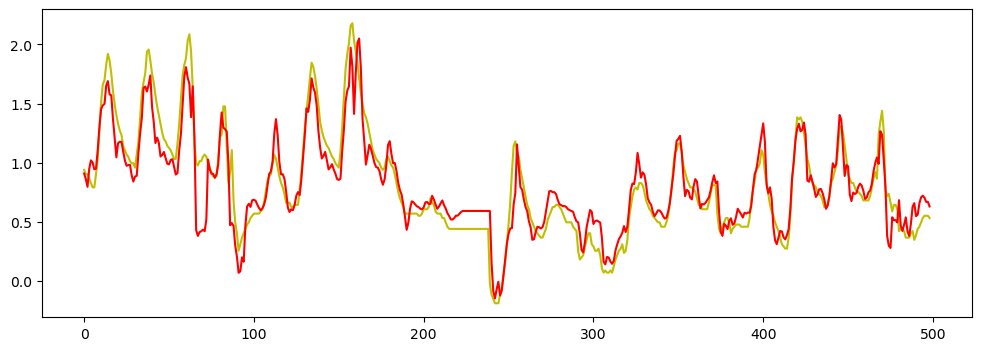

In [30]:
fig = plt.figure(figsize = (12,4))
plt.plot(op_val[1:500],'-y',label = 'orignal')
plt.plot(y_qklms_mse[1:500],'-r',label = 'lms_mse')

In [47]:
rk_size_arr = [0.39]
step_size_arr = [0.9]
threshold = 0.2
k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,alpha,cnt = algo_func.QKLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,threshold,2)
        klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,alpha,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,alpha,centers,rk_size,step_size)
        klms_mse_test[i][j] = algo_func.klms_mseror(ip_test,op_test,fil_order,alpha,centers,rk_size,step_size)

1 1


100%|███████████████████████████████████████████████| 1/1 [00:01<00:00,  1.36s/it]


In [50]:
print(klms_mse_test)

[[0.13942427]]


In [32]:
y_qklms_mcc = algo_func.klms_pred(ip_val,op_val,fil_order,alpha,centers,rk_size_arr[0],step_size_arr[0])

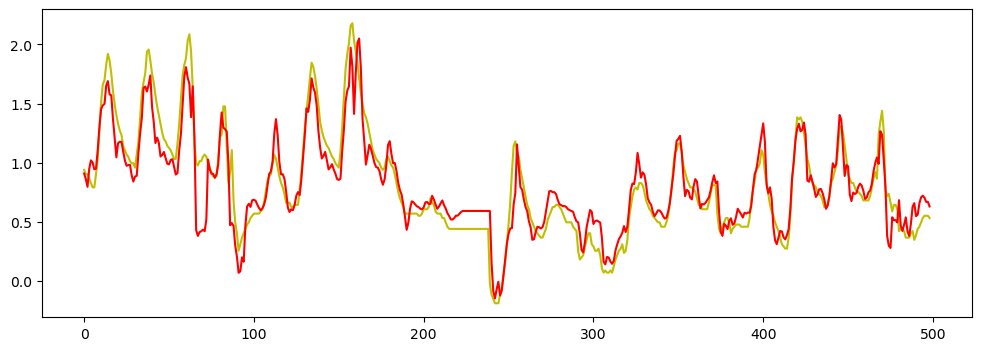

In [33]:
fig = plt.figure(figsize = (12,4))
plt.plot(op_val[1:500],'-y',label = 'orignal')
plt.plot(y_qklms_mse[1:500],'-r',label = 'lms_mse')